In [42]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [43]:
model_halfcell = pybamm.lithium_ion.BasicDFNHalfCell({"working electrode":"positive"})
parameter_values = model_halfcell.default_parameter_values

In [44]:
#Calling a library with NMC811
cheng2020 = pybamm.ParameterValues("Chen2020")
mohtat2020 = pybamm.ParameterValues("Mohtat2020")
    #In comments we show the predefined values by the default parameter_values
    
    #Changing parameters that come from default
    #GENERAL-PHYSICAL PARAMETERS
parameter_values["Current function [A]"] = 0.00011501
parameter_values["Nominal cell capacity [A.h]"]  = 0.00011501
parameter_values["Typical current [A]"] = 0.00011501
parameter_values["Upper voltage cut-off [V]"] = 4.4
parameter_values["Lower voltage cut-off [V]"] = 3.1
parameter_values['Separator thickness [m]'] #2.5e-05
parameter_values['Separator porosity']  #0.39

    #VARIABLES THAT COULD AFFECT CAPACITY   
parameter_values["Electrode height [m]"] = 0.065/76.5 #Per a OCP Chen2020 A 1C la relació ideal es 0.00092*3.15 // A C/10 0.00092*2.79 en la del sin i cos /75.25
parameter_values["Electrode width [m]"] =  1.58/76.5 #Per a OCP Chen2020 A 1C la relació ideal es 0.0021*3.15 // A C/10 0.0021*2.79
parameter_values["Positive electrode active material volume fraction"] = cheng2020["Positive electrode active material volume fraction"] #0.518
parameter_values["Positive electrode thickness [m]"]= cheng2020["Positive electrode thickness [m]"] #4.2e-05
parameter_values["Negative electrode thickness [m]"]= cheng2020["Negative electrode thickness [m]"]  #0.0007

    #POSITIVE ELECTRODE
    #Variables that change between Cheng and the default
parameter_values["Positive electrode OCP [V]"] = cheng2020["Positive electrode OCP [V]"] #Xu2019
parameter_values["Initial concentration in positive electrode [mol.m-3]"] = 12716
parameter_values["Maximum concentration in positive electrode [mol.m-3]"] = 51546
parameter_values["Positive electrode conductivity [S.m-1]"] = cheng2020["Positive electrode conductivity [S.m-1]"] #100.0
parameter_values["Positive electrode diffusivity [m2.s-1]"] = cheng2020["Positive electrode diffusivity [m2.s-1]"]#1e-14
parameter_values["Positive electrode porosity"] = cheng2020["Positive electrode porosity"] #0.331 Diff baja Cheng 0.335
parameter_values["Positive particle radius [m]"]  = cheng2020["Positive particle radius [m]"] #5.3e-06

    #Variables that don't change between Cheng and the default
parameter_values["Positive electrode cation signed stoichiometry"] #-1.0
parameter_values["Positive electrode charge transfer coefficient"] #0.5
parameter_values["Positive electrode double-layer capacity [F.m-2]"] #0.2
parameter_values["Positive electrode electrons in reaction"] #1.0
parameter_values["Positive electrode reaction-driven LAM factor [m3.mol-1]"] #0.0

parameter_values.process_model(model_halfcell)

In [45]:
# Resolution
t_eval = np.linspace(0, 36000,1000) #36000
sim = pybamm.Simulation(model_halfcell, parameter_values=parameter_values)
solution = sim.solve(t_eval)


At t = 0.00439922, , mxstep steps taken before reaching tout.
At t = 0.00439922, , mxstep steps taken before reaching tout.


In [46]:
# Dynamic plot
plot = pybamm.QuickPlot(
    solution,
    [
       
        "Discharge capacity [A.h]",
        "Current [A]",
        "Positive electrode potential [V]",
        "Terminal voltage [V]",
        "Positive particle concentration [mol.m-3]",
        "X-averaged positive particle surface concentration [mol.m-3]",
      
    ],
)
plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=7.864200393795156, step=0.07864200393795157)…

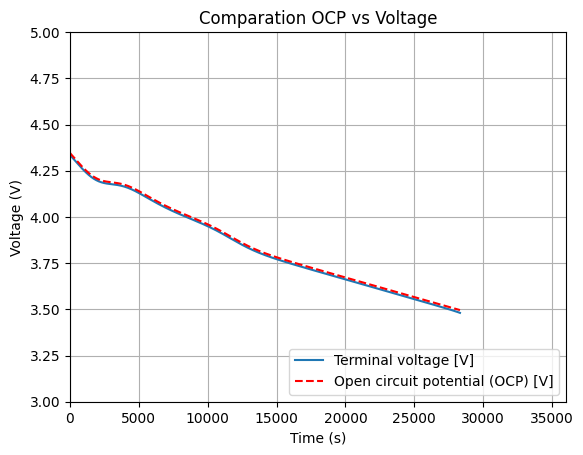

In [47]:
# Extraction of variables from solutions
V = solution["Terminal voltage [V]"].data
OCP = solution["Positive electrode open circuit potential [V]"].data
t = solution["Time [s]"].data
Discharge = solution["Discharge capacity [A.h]"].data
c_pos = solution["Positive particle concentration [mol.m-3]"].data
cs_pos = solution["Positive particle surface concentration [mol.m-3]"].data

# Voltage plot comparing terminal and OCV
fig, ax = plt.subplots()

ax.plot(t,V, label='Terminal voltage [V]')
ax.plot(t,OCP[1],'--r', label ='Open circuit potential (OCP) [V]')
ax.set_title('Comparation OCP vs Voltage')
ax.set(xlabel='Time (s)', ylabel='Voltage (V)')
plt.ylim([3,5])
plt.xlim([0,36000])
plt.grid()
ax.legend(frameon=True, loc='lower right', ncol=1)
# 28400 s dura la nosstra simulació 7.89

In [48]:
np.max(Discharge)

0.0009044616872903924

In [49]:
# Saving data to a csv file
#np.savetxt("Basic_Halfcell_concentration.csv", c_pos[1], delimiter=",")
np.savetxt("Basic_Halfcell_DFN1.csv", np.c_[t, OCP[1], V], delimiter=",")